In [4]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Créer un widget de saisie de texte
text_input = widgets.Text(
    value='',
    placeholder='Entrez votre texte ici',
    description='Texte:',
    disabled=False
)

# Créer un bouton
button = widgets.Button(description="Afficher le texte")

# Créer une zone de sortie pour afficher le texte
output = widgets.Output()

# Définir la fonction à exécuter lors du clic sur le bouton
def on_button_click(b):
    with output:
        output.clear_output()
        print(text_input.value)

# Associer la fonction au clic du bouton
button.on_click(on_button_click)

# Afficher les widgets
display(text_input, button, output)


Text(value='', description='Texte:', placeholder='Entrez votre texte ici')

Button(description='Afficher le texte', style=ButtonStyle())

Output()

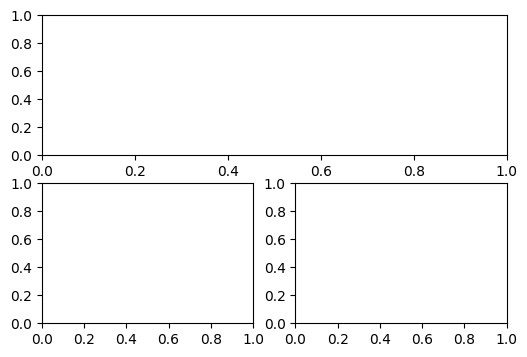

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Widgets
date_input = widgets.Text(placeholder='AAAA/M/J', description='Date :')
button_valider = widgets.Button(description="Valider la date", button_style='success')
output = widgets.Output()

# Figure
fig = plt.figure(figsize=(6, 4))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Callback
date_de_reference = None

def on_valider_clicked(b):
    global date_de_reference
    with output:
        clear_output()
        if date_input.value.strip():
            date_de_reference = date_input.value.strip()
            print(f"✅ Date enregistrée : {date_de_reference}")
        else:
            print("⚠️ Format invalide.")

button_valider.on_click(on_valider_clicked)

# Interface complète
display(widgets.VBox([
    widgets.HTML("<h4>🗓️ Saisir la date de référence :</h4>"),
    date_input,
    button_valider,
    output
]))

plt.show()


In [9]:
import pandas as pd
df_test = pd.DataFrame({
    "Atelier": ["A", "B", "A", "B", "C", "C", "C", "A"],
    "Classe": [">3mois", "<1 mois", "2 à 3 mois", "2 à 3 mois", ">3mois", "<1 mois", "<1 mois", "1 à 2 mois"]
})

df_test

,Atelier,Classe
0,A,>3mois
1,B,<1 mois
2,A,2 à 3 mois
3,B,2 à 3 mois
4,C,>3mois
5,C,<1 mois
6,C,<1 mois
7,A,1 à 2 mois


In [11]:
pivot_table=(df_test
             .groupby(['Atelier', 'Classe'])
             .size()
             .unstack(fill_value=0))

pivot_table

Classe,1 à 2 mois,2 à 3 mois,<1 mois,>3mois
Atelier,,,,
A,1,1,0,1
B,0,1,1,0
C,0,0,2,1


In [13]:
pivot_table["Total"] = pivot_table.sum(axis=1)

pivot_table

Classe,1 à 2 mois,2 à 3 mois,<1 mois,>3mois,Total
Atelier,,,,,
A,1,1,0,1,6
B,0,1,1,0,4
C,0,0,2,1,6


In [17]:
pivot_table.sort_values(by="Total", ascending=False, inplace=True)

pivot_table

Classe,1 à 2 mois,2 à 3 mois,<1 mois,>3mois,Total
Atelier,,,,,
A,1,1,0,1,6
C,0,0,2,1,6
B,0,1,1,0,4


In [27]:
pivot_table.drop(columns='Total')
pivot_table=pivot_table.reset_index()

In [ ]:
melted_table=pivot_table.melt(
    id_vars='Atelier',
    var_name='Classe',
    value_name='Nombre'
)

melted_table

,Atelier,Classe,Nombre
0,A,1 à 2 mois,1
1,C,1 à 2 mois,0
2,B,1 à 2 mois,0
3,A,2 à 3 mois,1
4,C,2 à 3 mois,0
5,B,2 à 3 mois,1
6,A,<1 mois,0
7,C,<1 mois,2
8,B,<1 mois,1
9,A,>3mois,1


TypeError: can only concatenate str (not "int") to str

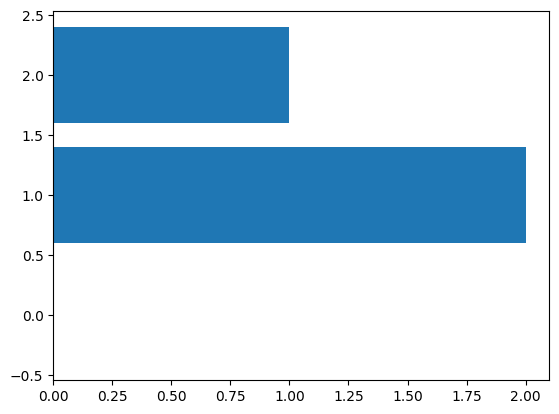

In [48]:
import numpy as np
import matplotlib.pyplot as plt

bottom = np.zeros(len(pivot_table))

for classe in ['<1 mois', '1 à 2 mois', '2 à 3 mois', '>3mois'] : 
    
    valeurs = melted_table[melted_table["Classe"] == classe]["Nombre"].values
    bars=plt.barh(
        pivot_table.index,
        valeurs,
        left=bottom,
        label=classe
          
        
    )
    bottom+=valeurs
    
#  Ajout des étiquettes 
    total_retards = pivot_table.sum(axis=1).values
    for i, (bar, val) in enumerate(zip(bars, valeurs)): 
        pourcentage = val / total_retards[i] * 100
        if val > 0: 

            plt.text( 

                bar.get_x() + bar.get_width() / 2, 

                bar.get_y() + bar.get_height() / 2, 

                f"{pourcentage:.0f}%", 

                ha='center', 

                va='center', 

                fontsize=9, 

                color='black' 

            )
            
plt.legend()
 
